In [17]:
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt

Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης

Τμήμα Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών


Μάθημα: Αριθμητική Ανάλυση

#  <center>ΠΡΟΓΡΑΜΜΑΤΙΣΤΙΚΕΣ ΕΡΓΑΣΙΕΣ </center>


Τζομίδης Νικόλαος-Φώτιος (9461)
             
#  <center><u>ΕΡΓΑΣΙΑ 1</u></center>
#### (α) 
Παρακάτω υλοποιούνται οι εξής κανόνες αριθμητικής ολοκλήρωσης(στην σύνθετη μορφή τους):
    
      - Αριστερού παραλληλογράμμου
      - Δεξιού παραλληλογράμμου
      - Τραπεζίου
      - Simpson
Επίσης γίνεται μια δοκιμή των μεθόδων υπολογίζοντας το: $$\int_1^2 x^3 \,dx= 3.75$$
με βήμα διακριτοποίησης το: $$h = \frac{(2 -1)}{1000} = 10 ^{-3}$$


In [18]:
def rectangleL(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a,b,n+1)
    x_left = x[:-1]
    return np.sum(f(x_left) * h)


def rectangleR(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a,b,n+1)
    x_right = x[1:]
    return np.sum(f(x_right) * h)
    

def trapezoid(f, a, b, n):
    h = float(b - a) / n
    s = f(a)
    for i in range(1,n):
        x = a + (h * i)
        s += 2 * f(x)
    s += f(b)
    return h * (s/2)


def simpson(f, a, b, n):
    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n, 2):
        s += 4 * f(a + i * h) #odd values of x_n
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h) #even values of x_n

    return s * h / 3


print(f"Left rectangle rule: {rectangleL(lambda x: (x ** 3), 1, 2, 1000)}")
print(f"Right rectangle rule: {rectangleR(lambda x: (x ** 3), 1, 2, 1000)}")
print(f"Trapezoid rule: {trapezoid(lambda x: (x ** 3), 1, 2, 1000)}")
print(f"Simpson rule: {simpson(lambda x: (x ** 3), 1, 2, 1000)}")

Left rectangle rule: 3.7465007500000005
Right rectangle rule: 3.75350075
Trapezoid rule: 3.7500007499999977
Simpson rule: 3.7500000000000004


#### (β) 
Εφαρμόζουμε τους παραπάνω κανόνες για το: $$\int_{0}^{\pi/4} e^{(3x)}\sin{(2x)} \,dx\ = \frac{3}{13} e^{(3\pi/4)} +  \frac{2}{13} \approx 2.5886$$
με βήμα διακριτοποίσης $ h \approx 7\cdot10^{(-4)}$.

Στην συνέχεια παράγουμε ένα log-log διάγραμμα όπου στον οριζόντιο άξονα έχουμε διάφορες τιμές για το βήμα διακριτοποίσης(h) και στον κάθετο τιμές για το απόλυτο σφάλμα όπως αυτό προκύπτει με τον καθένα από τους παραπάνω κανόνες ολοκλήρωσης.
 

Left rectangle rule: 2.584486897097939
Right rectangle rule: 2.592773416408327
Trapezoid rule: 2.588630156753135
Simpson rule: 2.5886286325068766



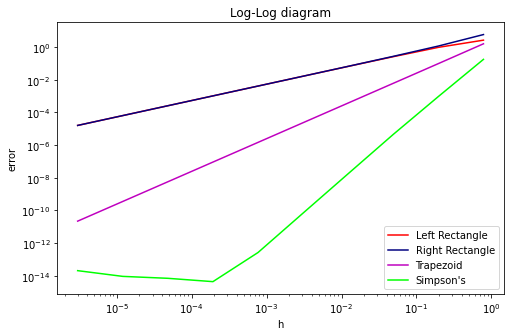

In [19]:
f = lambda x: (np.exp(3*x)*np.sin(2*x)) #function to integrate
a , b = 0, (np.pi)/4 #limits of integration
n = []
exact_solution = (1 / 13) * (3 * np.exp((3 * np.pi) / 4) + 2) #the exact solution of the given integral
error_T, error_S, error_L, error_R= [] , [], [], []
approximate_L, approximate_R, approximate_T, approximate_S = 0, 0, 0, 0

print(f"Left rectangle rule: {rectangleL(lambda x: (np.exp(3*x)*np.sin(2*x)), 0, np.pi/4, 1000)}")
print(f"Right rectangle rule: {rectangleR(lambda x: (np.exp(3*x)*np.sin(2*x)), 0, np.pi/4, 1000)}")
print(f"Trapezoid rule: {trapezoid(lambda x: (np.exp(3*x)*np.sin(2*x)), 0, np.pi/4, 1000)}")
print(f"Simpson rule: {simpson(lambda x: (np.exp(3*x)*np.sin(2*x)), 0, np.pi/4, 1000)}")
print("")

#for 10 iterations calculate the absolute error of each method
for i in range(0,10):
    n.append(4 ** i)
    approximate_L = rectangleL(f, a, b, n[i])
    error_L.append(abs(approximate_L - exact_solution))

    approximate_R = rectangleR(f, a, b, n[i]) 
    error_R.append(abs(approximate_R - exact_solution))

    approximate_T = trapezoid(f, a, b, n[i]) 
    error_T.append(abs(approximate_T - exact_solution)) 

    approximate_S = simpson(f, a, b, n[i])
    error_S.append(abs(approximate_S - exact_solution)) 

h = [((b - a) / j) for j in n]
plt.figure(figsize = (8,5))
plt.loglog(h,error_L,label = "Left Rectangle", color = "r")
plt.loglog(h,error_R,label = "Right Rectangle", color = "navy")
plt.loglog(h,error_T,label = "Trapezoid", color = "m")
plt.loglog(h,error_S,label = "Simpson's", color = "lime")
plt.xlabel("h")
plt.ylabel("error")
plt.title("Log-Log diagram")
plt.legend(loc = 4)
plt.show()

#### (γ)
Για τους παραπάνω 4 κανόνες ολοκλήρωσης έχουμε τους εξής τύπους σφαλμάτων:
   
   -Αριστερού παραλληλογράμμου: $E_L =\ \frac{h}{2} (\beta - \alpha ) f'(z)   ,  \alpha <\ z <\ \beta$

   -Δεξιού παραλληλογράμμου: $E_R =\ \frac{h}{2} (\beta - \alpha ) f'(z)   ,  \alpha <\ z <\ \beta$
   
   -Τραπεζίου: $E_T =\ -\frac{h^2}{12} (\beta - \alpha ) f''(z)   ,  \alpha <\ z <\ \beta$

   -Simpson: $E_S =\ -\frac{{(\frac{h}{2})}^4}{180} (\beta - \alpha ) f^{(4)}(z)   ,  \alpha <\ z <\ \beta$

Από τους παραπάνω τύπους γίνεται εύκολα αντιληπτό ότι το σφάλμα στην μέθοδο Simpson είναι πολύ μικρότερο για μικρά h στην συνάρτηση μας προς ολοκλήρωση ενώ ακολουθεί η μέθοδος του Τραπεζίου και έπειτα οι 2 μέθοδοι του Παραλληλογράμμου.

Με το παρακάτω script σε python μπορούμε να δούμε χαρακτηριστικά την διαφορά στα άνω όρια των σφαλμάτων των 3 μεθόδων για:  $ h \approx 7.85\cdot10^{(-3)}$

(Το σφάλμα του δεξιού παραλληλογράμμου παραλείπεται καθώς σε μικρές τιμές του h συμπίπτει με το αριστερό).

Όπως ήταν αναμενόμενο για μικρά h η μέθοδος Simpson εμφανίζει πολύ μικρότερα σφάλματα κάτι που παρατηρούμε και στο ζητούμενο διάγραμμα του ερωτήματος (β).
   

In [20]:
a , b = 0, np.pi/4 #integration limits
n = 100 # number of equally spaced points
h = (b - a) / n
x = sp.Symbol('x')
f = sp.exp(3*x)*sp.sin(2*x) #our f(x)

## error types for our methods using each Nth derivative
E_L = h * (b - a) * f.diff(x) * (1 / 2)
left_err = sp.lambdify(x, E_L)

E_T = - (1 / 12) * h**2 * (b - a) * f.diff(x,2)
trapezoid_err = sp.lambdify(x, E_T)

E_S = - (1 / 180) * (h / 2)**4 * (b - a) * f.diff(x,4)
simpson_err = sp.lambdify(x, E_S)

## print the upper bounds for the errors of each method with h,a,b constant.
print(f"Αριστερού παραλληλογράμμου: |E_L(h)| \u2264 {left_err(np.pi/4)}")
print(f"Τραπεζίου: |E_T(h)| \u2264 {abs(trapezoid_err(np.pi/4))}")
print(f"Simpson: |E_S(h)| \u2264 {simpson_err(np.pi/4)}")


Αριστερού παραλληλογράμμου: |E_L(h)| ≤ 0.09762325571004528
Τραπεζίου: |E_T(h)| ≤ 0.0002129809048320808
Simpson: |E_S(h)| ≤ 1.3028251864883635e-09


#  <center><u>ΕΡΓΑΣΙΑ 2</u></center>
#### (α)
Η παρακάτω συνάρτηση σε Python υλοποιεί την μέθοδο Euler για την αριθμητική επίλυση συστημάτων κανονικών διαφορικών εξισώσεων με αρχικές τιμές.


In [21]:
def euler(F,x0,t0,tmax,dt):
    t = np.arange(t0,tmax,dt)
    x = np.zeros((len(t), len(x0)))
    x[0,:] = x0
    for n in range(len(t)-1):
        x[n+1] = x[n] + dt * F(t[n],x[n])
    return t, x

#### (β)
Θα χρησιμοποιήσουμε την παραπάνω συνάρτηση για να επιλύσουμε το παρακάτω σύστημα διαφορικών εξισώσεων: $\begin{equation} \begin{cases} x_0' = 1.1 \cdot x_0 - 0.4 \cdot x_0 \cdot x_1 \\ x_1' = 0,4 \cdot x_0 \cdot x_1 - 0.1 \cdot x_1  \end{cases} \end{equation}$.

Με αρχικές συνθήκες $x_0(0)=20$ λαγούς και $x_1(0)=1$ αλεπού, χρησιμοποιώντας $t_{max} = 200$ και $dt = 0.02$.

In [22]:
x0 = [ 20 , 1 ] # initial conditions
t0 = 0
tmax = 200
dt = 0.02
F = lambda t,x: np.array([1.1*x[0] - 0.4*x[0]*x[1], 0.4*x[0] * x[1] - 0.1*x[1]])
t, x = euler(F,x0,t0,tmax,dt)

print(f"x0= {x[-1,0]}")
print(f"x1= {x[-1,1]}")

x0= 6.619181779459562e-26
x1= 0.012124661939614638


#### (γ)
Δημιουργούμε ένα διάγραμμα που δείχνει την εξέλιξη του πληθυσμού των λαγών και των αλεπούδων σε σχέση με τον χρόνο και ένα δεύτερο που δείχνει την εξέλιξη του πληθυσμού των λαγών σε σχέση με τον αντίστοιχο των αλεπούδων.

Στο πρώτο διαγράμμα βλέπουμε ότι μετά τις αρχικές τιμές των 20 λαγών και 1 αλεπούς υπάρχει μια ραγδαία αύξηση στον αριθμό των αλεπούδων, όταν όμως οι λαγοί ξαφνικά εξαφανίζονται παρατηρόύμε μια σποραδική μείωση του αριθμού των θηρευτών. Στην δεύτερη απότομη μεγαλύτερη αυτή την φορά αύξηση των λαγών βλέπουμε πάλι την ραγδαία επανεμφάνιση των αλεπούδων ενώ μόλις αυτοί εξαφανίζονται παρατηρείται μια πιο απότομη αυτή την φορά σποραδική μείωση στον πληθυσμό των θηρευτών.

Στο δεύτερο διάγραμμα το οποίο είναι ένα phase space διαγράμμα η σχεδόν κλειστή καμπύλη μας δείχνει μια περιοδικήτητα μεταξύ των 2 μεγεθών, θηραμάτων και θηρευτών δηλαδή.


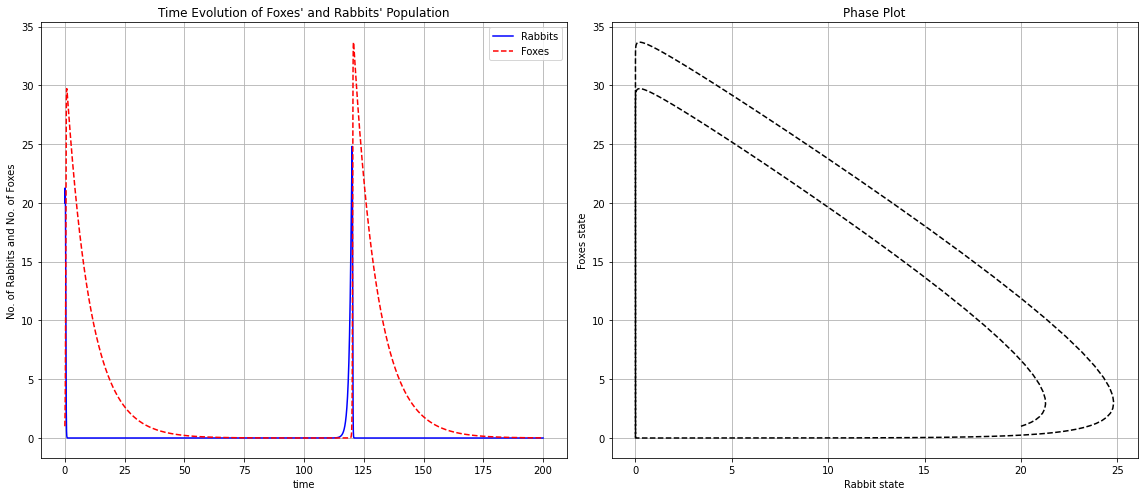

In [23]:

# Plot the solutions against time
fig, axes = plt.subplots(1,2,figsize = (16,7))
axes[0].plot(t,x[:,:-1],"b-",label = "Rabbits")
axes[0].plot(t,x[:,-1],"r--",label = "Foxes")
axes[0].grid()
axes[0].set_title("Time Evolution of Foxes' and Rabbits' Population")
axes[0].set_xlabel("time")
axes[0].set_ylabel("No. of Rabbits and No. of Foxes")
axes[0].legend()

# Plot one solution against the other
# In this plot time is implicit 
axes[1].plot(x[:,:-1], x[:,-1], "k--")
axes[1].grid()
axes[1].set_title("Phase Plot")
axes[1].set_xlabel("Rabbit state")
axes[1].set_ylabel("Foxes state")

fig.tight_layout()
plt.show()

#### (δ)
Παίρνουμε τώρα $dt' =  \frac{1}{10} \cdot dt =0.002$.

Αυτό που παρατηρούμε είναι μια εξισορρόπηση στις ακραίες τιμές του πρώτου διαγράμματος ενώ στο δεύτερο πλέον η καμπύλη είναι κλειστή όπου επιβεβαιώνεται και η περιοδικότητα μεταξύ των δύο μεγεθών.

Ταυτόχρονα παρατηρούμε ότι με την μείωση του βήματος διακριτοποίησης βελτιώνεται και η ακρίβεια της μεθόδου του Euler.

x0= 3.367986782722254e-11
x1= 0.004711052983783616


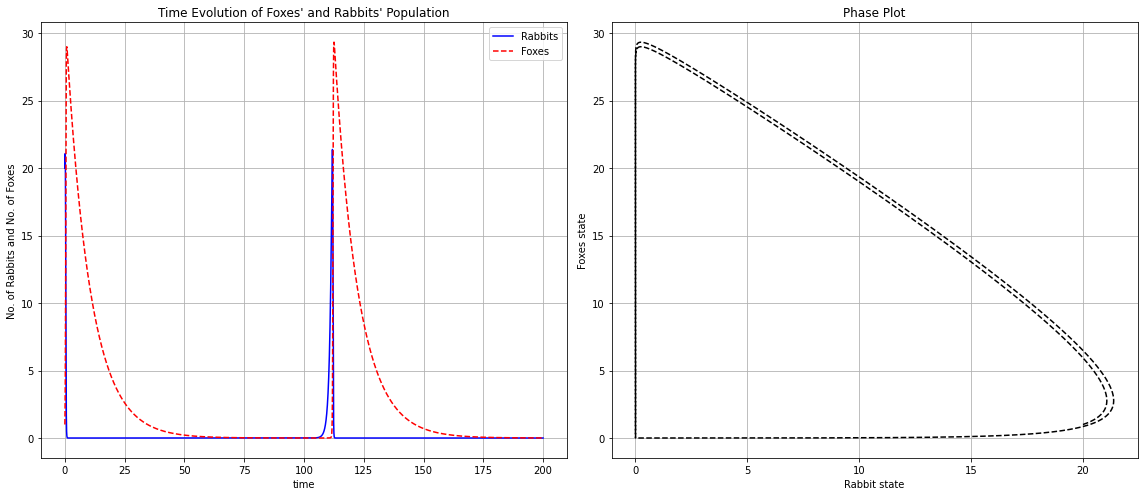

In [24]:
x0 = [ 20 , 1 ] # initial conditions
t0 = 0
tmax = 200
dt2 = 0.002
F = lambda t,x: np.array([1.1*x[0] - 0.4*x[0]*x[1], 0.4*x[0] * x[1] - 0.1*x[1]])
t, x = euler(F,x0,t0,tmax,dt2)

print(f"x0= {x[-1,0]}")
print(f"x1= {x[-1,1]}")

# Plot the solutions against time
fig, axes = plt.subplots(1,2,figsize = (16,7))
axes[0].plot(t,x[:,:-1],"b-",label = "Rabbits")
axes[0].plot(t,x[:,-1],"r--",label = "Foxes")
axes[0].grid()
axes[0].set_title("Time Evolution of Foxes' and Rabbits' Population")
axes[0].set_xlabel("time")
axes[0].set_ylabel("No. of Rabbits and No. of Foxes")
axes[0].legend()

# Plot one solution against the other
# In this plot time is implicit 
axes[1].plot(x[:,:-1], x[:,-1], "k--")
axes[1].grid()
axes[1].set_title("Phase Plot")
axes[1].set_xlabel("Rabbit state")
axes[1].set_ylabel("Foxes state")

fig.tight_layout()
plt.show()